In [1]:
from mesh_and_PDE_classes import PDE, Mesh
import numpy as np
import matplotlib.pyplot as plt

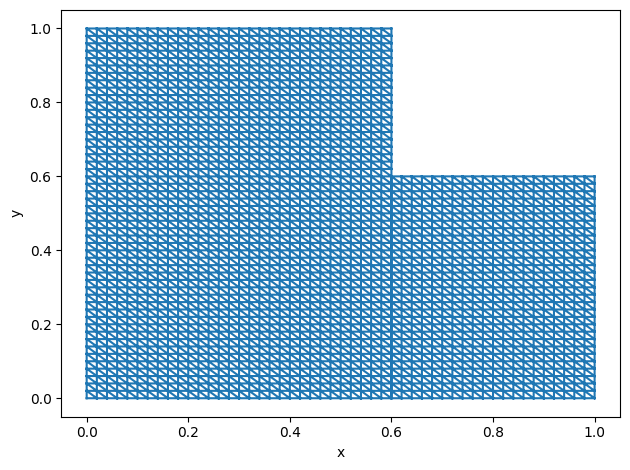

In [2]:
#création du maillage
L_mesh=Mesh(0.6)
L_mesh.GenerateLShapeMesh(50)
L_mesh.plot_mesh()

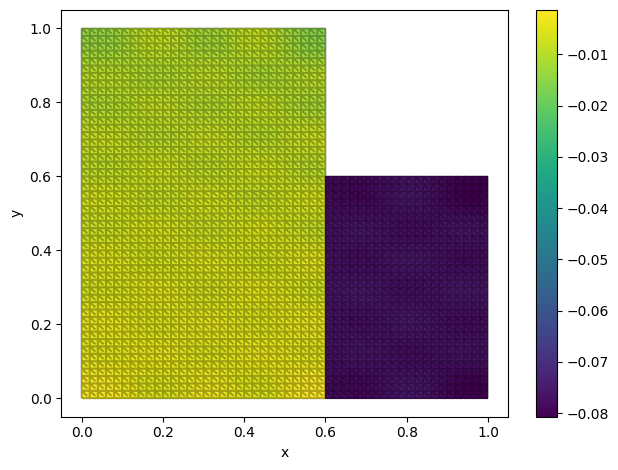

In [3]:

# Création d'une PDE sur ce maillage
pde = PDE(mesh=L_mesh)

# Assemblage des matrices
pde.generate_global_matrix()

# terme source
def f_source(x, y, b_x, b_y, p, q, r):
    return np.exp((b_x * x + b_y * y) / 2) * np.sin(p * r * np.pi * x) * np.sin(q * r * np.pi * y)

f = lambda x, y: f_source(x,y,1,1,2,3,4)  # exemple de fonction source

# Résolution de la PDE pour le terme source f_source(x,y,1,1,2,3,4)
pde.solve(f)

# Affichage de la solution
pde.plot_approximation(pde.solution) 

In [4]:
# Test des matrices
print(pde.test_mass_matrix())
print(pde.test_rig_matrix())
print(pde.test_rig_matrix2(10,-23))

la valeur UtMU est-elle égale de celle de l'aire (2*l-l^2=0.84): False
K*u est-il proche du vecteur nul: True
V^T * K * U = 4.424493305066335e-11, est-ce proche de 0: True


In [5]:
def u_ex(x,y, p, q, r):
    return f_source(x,y,1, 1, p, q, r)/(p**2+q**2+r**2)/(1 + 1/4 + 1/4 + (p*r*np.pi)**2 + (q*r*np.pi)**2 )

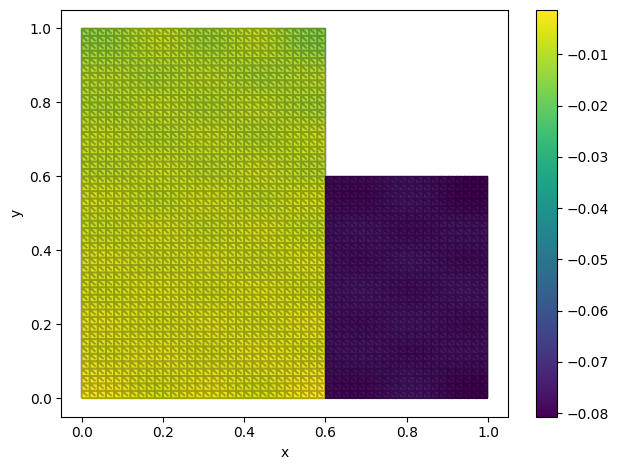

In [6]:
#solution exacte pour b_x=b_y=c=1
def u_ex(x,y, p, q, r):
    return f_source(x,y,1, 1, p, q, r)/(p**2+q**2+r**2)/(1 + 1/4 + 1/4 + (p*r*np.pi)**2 + (q*r*np.pi)**2 )

pde.plot_error(lambda x,y: u_ex(x,y,2,3,4))

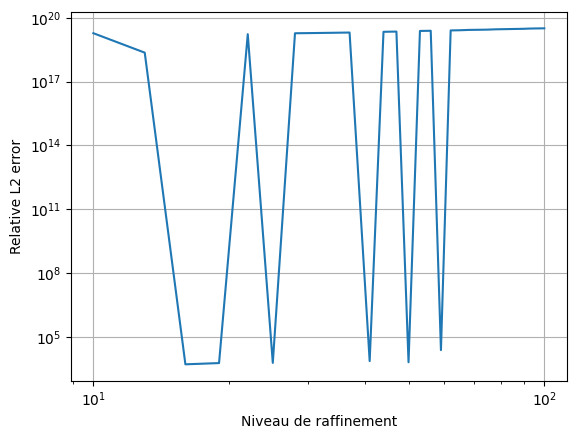

In [13]:
def plot_convergence(refinement_levels, exact_solution):
    errors = []
    norms = []

    for N in refinement_levels:
        mesh = Mesh(0.6)
        mesh.GenerateLShapeMesh(N)
        pde = PDE(mesh, b=np.array([1, 1]), c=1)
        pde.generate_global_matrix()
        pde.solve(f)
        u_h = pde.solution

        u_exact = exact_solution(mesh.vtx[:, 0], mesh.vtx[:, 1])
        u_ex_interpolated = np.interp(mesh.vtx[:, 0], mesh.vtx[:, 0], u_exact)
        error = pde.compute_L2_norm( u_h - u_ex_interpolated)
        norm = pde.compute_L2_norm(u_ex_interpolated)
        errors.append(error)
        norms.append(norm)

    errors = np.array(errors)
    norms = np.array(norms)
    plt.loglog(refinement_levels, errors / norms)
    plt.xlabel('Niveau de raffinement')
    plt.ylabel('Relative L2 error')
    plt.grid(True)
    plt.show()


exact_solution = lambda x,y: u_ex(x,y,2,3,4)
plot_convergence(np.linspace(10,100,30,dtype=int),exact_solution )